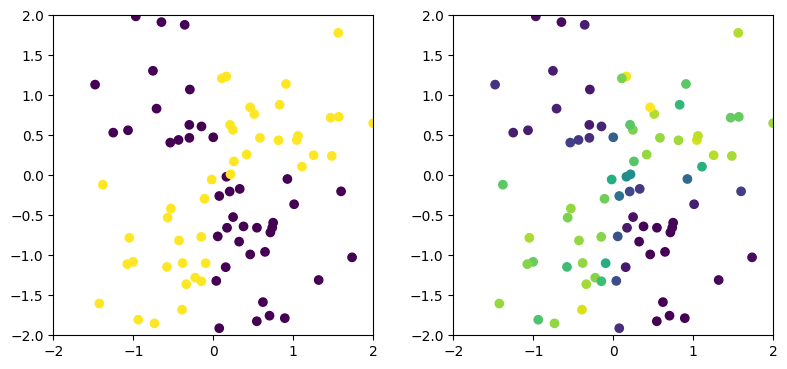

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class ThreeLayerPerceptron:
    def __init__(self, N_inputs, N_hidden, N_output):        
        self.W_IH = np.random.randn(N_inputs, N_hidden)
        self.W_HO = np.random.randn(N_hidden, N_output)

        self.b_IH = np.random.randn( N_hidden)
        self.b_HO = np.random.randn( N_output)
    
    def activation(self,F):
        return np.tanh(F)+1
    
    def activation_derivative(self,F):
        return 1 - np.tanh(F)**2
    
    def feedforward(self,X):
        zIH = np.dot(X, self.W_IH) + self.b_IH
        aH = self.activation(zIH)        
        zHO = np.dot(aH, self.W_HO) + self.b_HO
        aO = self.activation(zHO)
        return aH, aO, zIH, zHO

    def cost(self, Y, aO):        
        return 0.5*np.mean((Y - aO)**2)
    
    def cost_derivative_over_activation(self, Y, aO):        
        return ( aO - Y )

    def backpropagation(self, X, Y, aH, aO, zIH, zHO):
        deltaO = self.cost_derivative_over_activation( Y, aO) *  self.activation_derivative( zHO)
        deltaW_HO = aH.T * deltaO        
        deltaH = np.dot(deltaO, self.W_HO.T) * self.activation_derivative(zIH)
        deltaW_IH = np.outer(X, deltaH) 
        if deltaW_IH.ndim == 1:
            deltaW_IH = deltaW_IH[:, np.newaxis]
        if deltaW_HO.ndim == 1:
            deltaW_HO = deltaW_HO[:, np.newaxis]        
        return deltaW_IH, deltaW_HO, deltaH, deltaO
    
    def update_weights(self,deltaW_IH, deltaW_HO, lr=0.001):
        self.W_IH -= lr * deltaW_IH
        self.W_HO -= lr * deltaW_HO
        return self.W_IH, self.W_HO

    def update_biases(self, deltaH, deltaO, lr=0.001):
        self.b_IH -= lr * deltaH
        self.b_HO -= lr * deltaO
        return self.b_IH, self.b_HO

    def train(self, X, Y, epochs=100, lr=0.01):
        for _ in range(epochs):                       
            for i in range(np.size(X,0)):  
                aH, aO, zH, zO = self.feedforward(X[i,:])                 
                deltaW_IH, deltaW_HO, deltaH, deltaO = self.backpropagation(X[i,:], Y[i,:], aH, aO, zH, zO) 
                self.update_weights(deltaW_IH, deltaW_HO, lr=0.01)
                self.update_biases(deltaH, deltaO, lr=0.01)     



def main():
    ### model
    model = ThreeLayerPerceptron(2, 10, 1)
    epochs = 5000
    learning_rate = 0.0002
    
    ### data
    N = 90 ### number of samples
    X = np.random.randn(N, 2)        
    Y = np.random.randn(N, 1)
    for i in range(N):
        if X[i,0] > 0 and X[i,1] > 0:
            Y[i,0] = 0.9
        elif X[i,0] < 0 and X[i,1] < 0:
            Y[i,0] = 0.9
        elif X[i,0] > 0 and X[i,1] < 0:
            Y[i,0] = 0.1
        elif X[i,0] < 0 and X[i,1] > 0:
            Y[i,0] = 0.1


    ### training
    model.train(X, Y, epochs=epochs, lr=learning_rate)
    ### inference
    out_store = np.zeros((N, 1))
    for i in range(np.size(X,0)):
        aH, aO, zH, zO = model.feedforward(X[i,:])
        out_store[i] = aO        
    

    ### plot
    fig = plt.figure(figsize=(8, 8))
    ax1=fig.add_axes([0.01,0.01,0.4,0.4])
    ax2=fig.add_axes([0.51,0.01,0.4,0.4])
    
    ax1.scatter(X[:,0], X[:,1], c=np.abs(Y), cmap="viridis")
    ax1.set_xlim([-2,2])
    ax1.set_ylim ([-2,2])

    ax2.scatter(X[:,0], X[:,1], c=np.abs(out_store), cmap="viridis")
    ax2.set_xlim([-2,2])
    ax2.set_ylim ([-2,2])


## ## main
if __name__ == "__main__":
    main()    
 

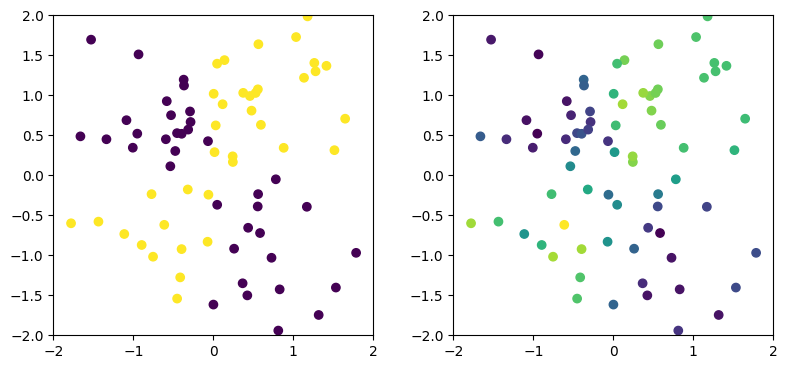

In [86]:
import numpy as np
import matplotlib.pyplot as plt

class MultiLayerPerceptron:

    def __init__(self, N_inputs, N_output, Nhidden ):                        
        self.W = {}
        self.B = {}

        if type(Nhidden) == int:
            Nhidden = [Nhidden]        
        NW = len(Nhidden)  

        def init_weights(Nin, Nout):
            Winit = np.random.randn(Nin, Nout)
            return Winit

        def init_bias(Nout):
            binit = np.random.randn(Nout)   
            return binit

        ### initialize weights and biases
        for n in range(NW+1):
            if n == 0:
                    Nin = N_inputs
                    Nout = Nhidden[n]                                                
            elif n == NW:
                    Nin = Nhidden[n-1]
                    Nout = N_output                        
            else:
                    Nin = Nhidden[n-1]
                    Nout = Nhidden[n]
            w = init_weights(Nin,Nout)            
            b = init_bias(Nout)
            
            #print('init W len', len(self.W))
            self.W[n] = w
            self.B[n] = b            
            

    def activation(self,F):
        return np.tanh(F)

    def activation_derivative(self,F):
        return 1 - np.tanh(F)**2

    def cost(self, Y, aO):        
        return 0.5*np.mean((Y - aO)**2)
    
    def cost_derivative_over_activation(self, Y, aO):        
        return ( aO - Y )


    def feedforward(self,X):                
        z,a ={},{}        
        z[0] = np.dot(X, self.W[0]) + self.B[0]        
        a[0] = self.activation(z[0])                 
        for n in range(1,len(self.W)):
             z[n] = np.dot(a[n-1], self.W[n]) + self.B[n]
             a[n] = self.activation(z[n])
        return z, a


    def backpropagation(self, X, Y, a, z):

        deltas,deltaW = {},{}
        layer_coef = len(a)-1             

        deltaL = self.cost_derivative_over_activation( Y, a[layer_coef] ) * self.activation_derivative( z[layer_coef] )
        deltaW_L = np.outer(a[layer_coef-1], deltaL)                
        deltas[ layer_coef ] = deltaL
        deltaW[ layer_coef ] = deltaW_L

        for i in range(layer_coef-1, -1,-1):
            deltas[i] = np.dot(deltas[i+1], self.W[i+1].T) * self.activation_derivative(z[i])
            deltaW[i] = np.outer(a[i], deltas[i])
            if deltaW[i].ndim == 1:
                deltaW[i] = deltaW[i][:, np.newaxis]
            if i == 0:
                deltaW[i] = np.outer(X, deltas[i])
            else:
                deltaW[i] = np.outer(a[i-1], deltas[i])
        return deltas, deltaW



    def update_weights(self, deltaW, lr):
        for i in range(len(deltaW)):
            self.W[i] -= lr * deltaW[i]
        return self.W[i]

    def update_biases(self, deltas, lr):
        for i in range(len(self.B)-1):
            self.B[i] -= lr * deltas[i]
        return self.B


    def train(self, X, Y, epochs=10, lr = 0.01):
        for _ in range(epochs):                       
            for i in range(np.size(X,0)):
                a,z = self.feedforward(X[i,:])
                deltas, deltaW = self.backpropagation(X[i,:], Y[i,:], a, z)                                                                                
                self.update_weights(deltaW, lr=lr)
                self.update_biases(deltas, lr=lr)
                

##### PERCEPTION CLASS END

def gen_training_data(N):
    X = np.random.randn(N, 2)
    Y = np.random.randn(N, 1)
    for i in range(N):
        if X[i,0] > 0 and X[i,1] > 0:
            Y[i,0] = 0.9
        elif X[i,0] < 0 and X[i,1] < 0:
            Y[i,0] = 0.9
        elif X[i,0] > 0 and X[i,1] < 0:
            Y[i,0] = 0.1
        elif X[i,0] < 0 and X[i,1] > 0:
            Y[i,0] = 0.1
    return X, Y


#### main
def main():
    model = MultiLayerPerceptron(2, 1, [8,4])    
    
    N = 80 ### N training samples
    X,Y = gen_training_data(N)        
    model.train(X, Y, epochs=4000, lr=0.0005)
        
    out_store = np.zeros((N, 1))            
    for i in range(np.size(X,0)):
        z,a = model.feedforward(X[i,:])         
        out_store[i] = a[len(a)-1]

    ### plot
    fig = plt.figure(figsize=(8, 8))
    ax1=fig.add_axes([0.01,0.01,0.4,0.4])
    ax2=fig.add_axes([0.51,0.01,0.4,0.4])
    
    ax1.scatter(X[:,0], X[:,1], c=np.abs(Y), cmap="viridis")
    ax1.set_xlim([-2,2]), ax1.set_ylim ([-2,2])
    
    ax2.scatter(X[:,0], X[:,1], c=np.abs(out_store), cmap="viridis")
    ax2.set_xlim([-2,2]),  ax2.set_ylim ([-2,2])


if __name__ == "__main__":
    main()